<a href="https://colab.research.google.com/github/shofiaayuu/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : SHOFIATUL AYU ANIKANINGRUM

KELAS : TI - 3F

ABSEN : 29

PERTEMUAN 5



# Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

# TUGAS PRAKTIKUM
1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
#import math
from math import log10, sqrt, pow
import os
import glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


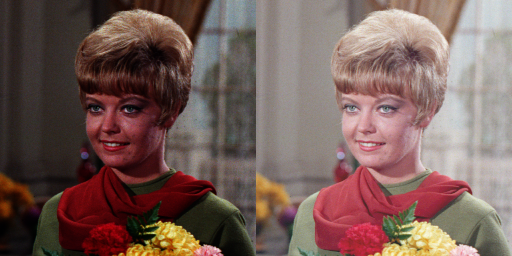

In [29]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# Membaca citra yang ingin diubah
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)




2. Buat Simulasi Image Depth

  Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

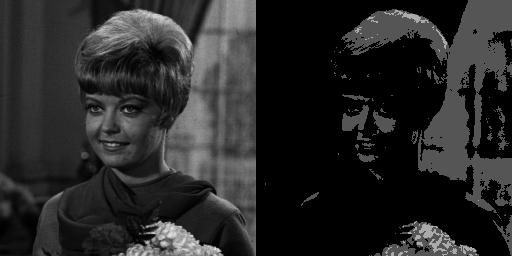

In [31]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff', cv.IMREAD_GRAYSCALE)
image_depth = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    image_depth[y,x] = int(original[y, x] / level) * int(level)

final_frame = cv.hconcat((original, image_depth))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).


Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan anda :

- Jumlah citra di average 5

Nilai PNSR : 27.54176205862226  db


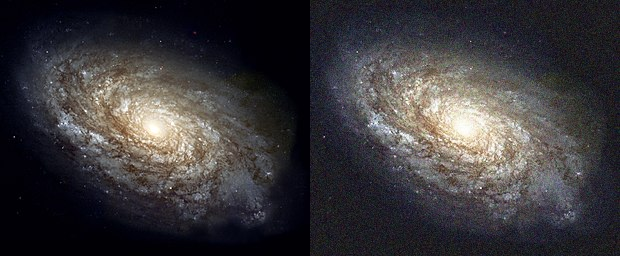

In [59]:
# Jumlah citra di Average 5
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
noise_image = cv_img[4]

#index mulai 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print('Nilai PNSR :',psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

  - Jumlah citra di average 10



Nilai PNSR : 27.55048941000866  db


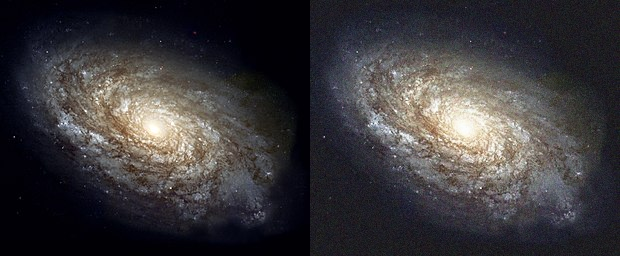

In [58]:
# Jumlah citra di Average 10
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
noise_image = cv_img[9]

#index mulai 0
for i in range(9):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print('Nilai PNSR :',psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

 - Jumlah citra di average 20

Nilai PNSR : 27.542209176474827  db


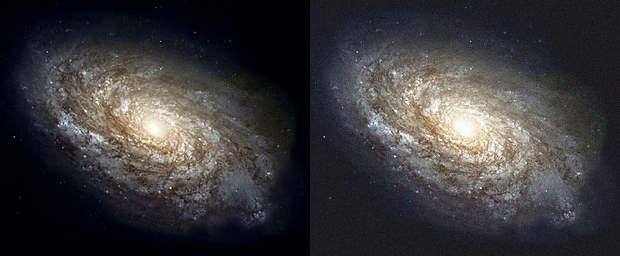

In [60]:
# Jumlah citra di Average 20
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
noise_image = cv_img[19]

#index mulai 0
for i in range(19):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print('Nilai PNSR :',psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

  - Jumlah citra di average 40

Nilai PNSR : 27.502516569174837  db


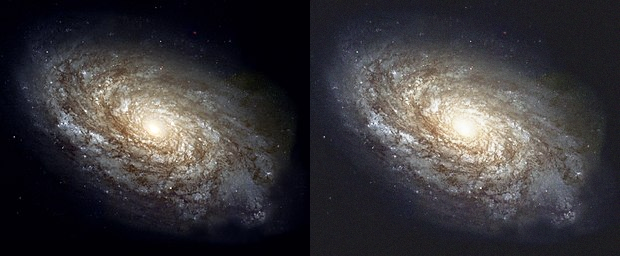

In [61]:
# Jumlah citra di Average 40
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
noise_image = cv_img[39]

#index mulai 0
for i in range(39):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print('Nilai PNSR :',psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)


 - Jumlah citra di average 80

Nilai PNSR : 27.503543003056624  db


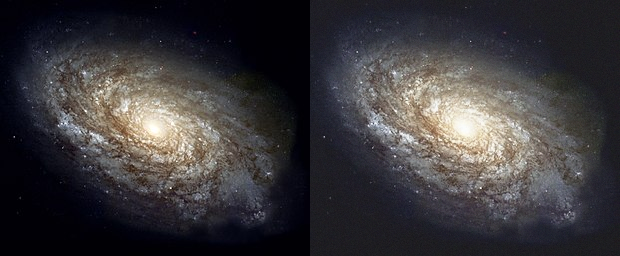

In [62]:
# Jumlah citra di Average 80
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
noise_image = cv_img[79]

#index mulai 0
for i in range(79):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print('Nilai PNSR :',psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

 - Jumlah citra di average 100

Nilai PNSR : 27.506900261157018  db


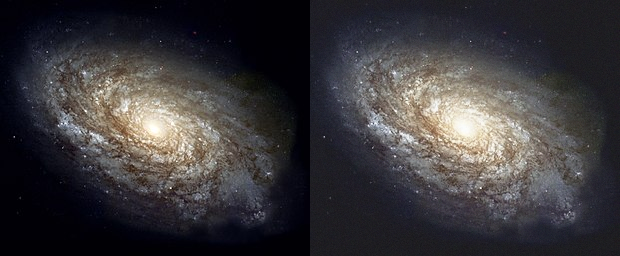

In [63]:
# Jumlah citra di Average 80
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
noise_image = cv_img[99]

#index mulai 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print('Nilai PNSR :',psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

  Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah :

  Dalam kasus ini, proses average dari sekitar 100 citra tampaknya memberikan hasil denoising yang cukup baik dengan nilai PSNR sekitar 27.5 dB. Selanjutnya, peningkatan jumlah citra mungkin tidak lagi memberikan manfaat yang signifikan dalam hal kualitas citra denoised. Oleh karena itu, penting untuk memahami titik jenuh dalam proses denoising untuk mencapai hasil yang efisien dalam pengurangan noise pada citra.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

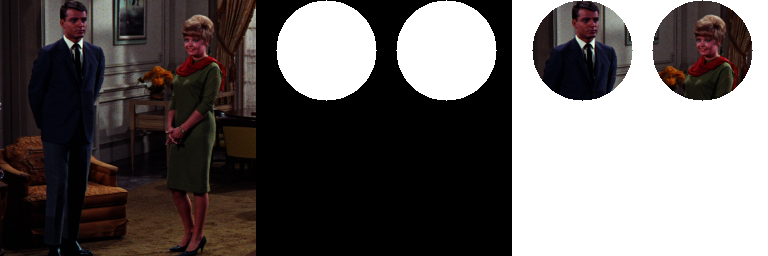

In [34]:
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

 - Operator NOT (komplemen)

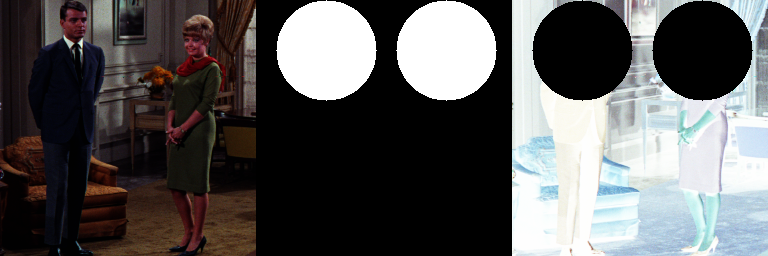

In [81]:
# Operator NOT
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & ~mask & ~mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

- Operator OR (Atau)

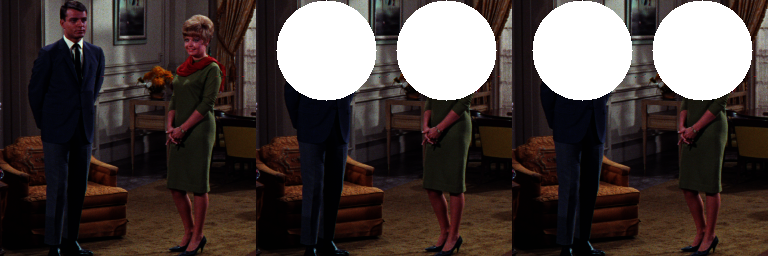

In [66]:
# Operator OR
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = cv.bitwise_or(img, mask, mask2)
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

- Operator AND (Dan)

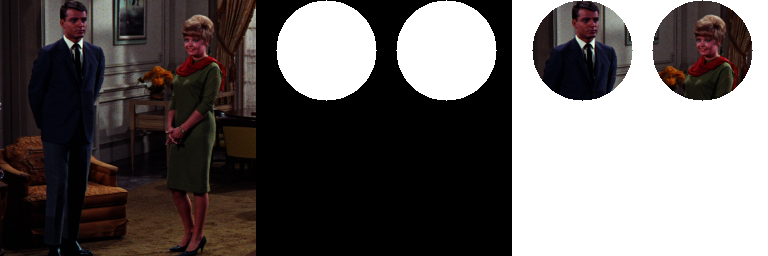

In [67]:
# Operator AND
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

- Operator NAND (Not And)

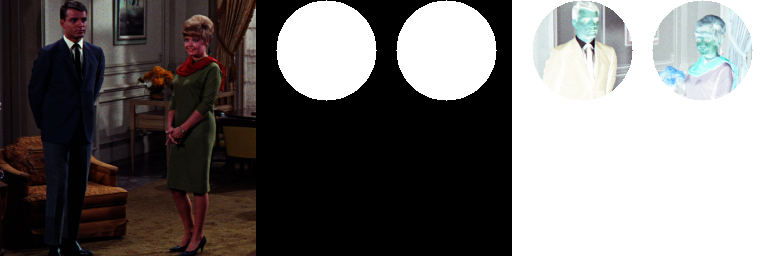

In [77]:
# Operator NAND
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & mask
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

- Operator XOR (Exlusive Or)

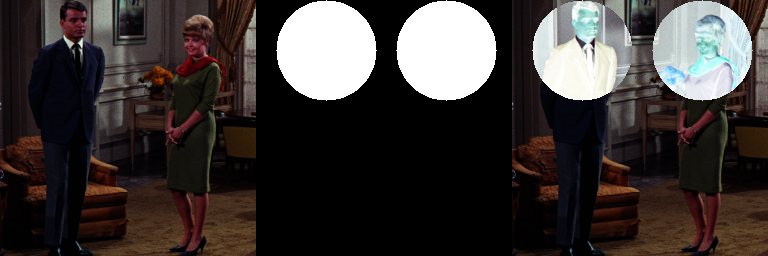

In [79]:
# Operator XOR
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = cv.bitwise_xor(img, mask)
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Tuliskan hasil analisa Anda!

Setelah melakukan operasi logika pada citra menggunakan operator NOT, OR, AND, NAND, dan XOR bisa disimpulkan :

Operator NOT : Citra menjadi negatif.

Operator OR : Gabungan dua lingkaran putih pada citra asli.

Operator AND : Area terbatas dari kedua lingkaran putih yang tumpang tindih.

Operator NAND : Area tumpang tindih menjadi negatif.

Operator XOR : Area yang tidak tumpang tindih dari kedua lingkaran putih.

Ini adalah hasil dari berbagai operasi logika pada citra, yang memiliki efek yang berbeda tergantung pada masker yang digunakan dan tujuan analisis citra.

